# RL For Controlled Environment Agriculture

### Abstract
---
Make an OpenAI Gym environment for training DRL algorithms.
Compare different algorithms to determine which are the most robust to:
1. environmental conditions outside of training distribution
2. transfer learning between growth environments of different physical scale

## 1. Introduction
---

Demands on agricultural systems will increase as the world population continues to increase.
Labor is the dominant cost component in most agricultural system.
Unsurprisingly, most research focuses on reduction of labor costs through increased efficiency via mechanization, automation and increased yield.
Controlled environment Agriculture (CEA) is an old idea gaining more recent momentum due to advances in automation, lighting and climate control.
One of the fundamental challenges of CEA is optimal control of the growing environment.
Traditional methods of optimal control in agriculture include reactive methods (thermostats) and predictive methods (PID).
Reinforcement leaning(RL) is a well studied field that offers solutions for optimal control problems.
The combination of RL and Deep Learning(DL) techniques created the collection of techniques known as Deep Reinforcement Learning (DRL).
There is increasing interest in using DRL in real life optimal control problem including CEA.

## 2. Related Work
---
Most relevant related work is coming out of China.
Some good papers and some very bad ones.
All papers are essentially a proof of concept and do not rigorously explore the RL component.
Most of the recent papers use Actor-Critic because it is the most accessible SOTA for model-free RL.
Another common theme is using IoT devices to collect observational data.

Opportunities for further research:
- robustness to climate outside historical distribution
- robustness to deployment in diverse cultivation structures
- exploring value vs policy methods
- physically informed model based RL

Most relevant related work:
- <div class="csl-entry">Cao, X., Yao, Y., Li, L., Zhang, W., An, Z., Zhang, Z., Guo, S., Xiao, L., Cao, X., &#38; Luo, D. (2021). <i>IGrow: A Smart Agriculture Solution to Autonomous Greenhouse Control</i>. http://arxiv.org/abs/2107.05464</div>
- <div class="csl-entry">An, Z., Cao, X., Yao, Y., Zhang, W., Li, L., Wang, Y., Guo, S., &#38; Luo, D. (2021). <i>A Simulator-based Planning Framework for Optimizing Autonomous Greenhouse Control Strategy</i>. www.aaai.org</div>
- <div class="csl-entry">Zhang, W., Cao, X., Yao, Y., An, Z., Luo, D., &#38; Xiao, X. (2021). <i>Robust Model-based Reinforcement Learning for Autonomous Greenhouse Control</i>. http://arxiv.org/abs/2108.11645</div>
- <div class="csl-entry">Overweg, H., Berghuijs, H. N. C., &#38; Athanasiadis, I. N. (2021). <i>CropGym: a Reinforcement Learning Environment for Crop Management</i>. http://arxiv.org/abs/2104.04326</div>
- <div class="csl-entry">Wang, L., He, X., &#38; Luo, D. (2020). Deep reinforcement learning for greenhouse climate control. <i>Proceedings - 11th IEEE International Conference on Knowledge Graph, ICKG 2020</i>, 474–480. https://doi.org/10.1109/ICBK50248.2020.00073</div>
- <div class="csl-entry">Sun, L., Yang, Y., Hu, J., Porter, D., Marek, T., &#38; Hillyer, C. (2018). Reinforcement learning control for water-efficient agricultural irrigation. <i>Proceedings - 15th IEEE International Symposium on Parallel and Distributed Processing with Applications and 16th IEEE International Conference on Ubiquitous Computing and Communications, ISPA/IUCC 2017</i>, 1334–1341. https://doi.org/10.1109/ISPA/IUCC.2017.00203</div>
- <div class="csl-entry">Ban, B., &#38; Kim, S. (2017). Control of nonlinear, complex and black-boxed greenhouse system with reinforcement learning. <i>2017 International Conference on Information and Communication Technology Convergence (ICTC)</i>, 913–918. https://doi.org/10.1109/ICTC.2017.8190813</div>


## 3. Alpha Grow
---
The goal is to assess which algorithms are the most robust to the following conditions:
1. climatic conditions outside historical training distribution (generalizable)
2. quickly adapting to new growth environments (sample efficiency)

While exploring these two goals, the following will be elucidated:
1. Are value or policy based methods best for optimal control in this domain
2. Are model-based or model free methods more effective in this domain

### 3.1 Greenhouse Gym
To assess these research questions a simulated environment is needed.
This simulation environment is constructed using a OpenAI Gym interface.
OpenAI Gym interfaces are an industry standard for developing and comparing RL algorithms.
The greenhouse simulator will calculate environmental conditions using a set of differential equations.
Assessing value based methods will require a discrete action space and policy based methods will require a continuous action space.


### 3.2 RL Algorithms
RL in real world situations uses both poly-based and value-based agents as well as model and model-free algorithms.
The most relevant recent work in DRL CEA utilized some form of Actor-Critic methodology.
This is likely because reference implementations are readily available, and it combines policy and value based estimations.

However, other challenging real-world control problems utilize probabilistic value based methods and model informed tree search.
Therefore, I believe it is worthwhile to do a thorough investigation of what algorithms perform best in what situations.

Some suitable algorithms:
1. Deep-Q and varieties (PDQN, DoubleDQN, Rainbow)
2. Quantile Regression DQN
3. Vanilla policy gradient
4. Trust region policy optimization
5. Proximal policy optimization
6. Deep deterministic policy gradient
7. Twin delayed DDPG
8. Soft Actor Critic


## 4. Experiments
---
Here are some basic POC base experiments.

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [ ]:
"""Discrete Gym Environment"""
env = gym.make("gym_greenhouse:greenhouse-v0")
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")

In [ ]:
"""Vanilla Deep Q"""
from agents.DQ_Agent import DQAgent

action_size = env.action_space.n
observation_size = env.observation_space.n
agent = DQAgent(observation_size, action_size, seed=0)
rewards_history = []
num_episodes = int(2e3)

for i_episode in range(1, num_episodes):
    observation = env.reset()
    done = False
    while not done:

        action = agent.act(observation)
        next_observation, reward, done, info = env.step(action)
        agent.step(observation, action, reward, next_observation, done)
        observation = next_observation

    if i_episode == 1:
        env.render()

    if i_episode % 100 == 0:
        print(f"Episode: {i_episode}, Average Reward: {np.mean(rewards_history[-100:])}")

    rewards_history.append(np.sum(env.reward_history))

print("Training Complete")
env.render()
rewards_DQ = np.convolve(rewards_history, np.ones(10), 'valid') / 10
x = np.arange(len(rewards_DQ))
plt.plot(x, rewards_DQ)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

In [ ]:
"""Prioritized Deep Q"""
from agents.PDQN_Agent import PDQNAgent

action_size = env.action_space.n
observation_size = env.observation_space.n
agent = PDQNAgent(observation_size, action_size, seed=0)
rewards_history = []
num_episodes = int(2e3)

for i_episode in range(1, num_episodes):
    observation = env.reset()
    done = False
    while not done:

        action = agent.act(observation)
        next_observation, reward, done, info = env.step(action)
        agent.step(observation, action, reward, next_observation, done)
        observation = next_observation

    if i_episode == 1:
        env.render()

    if i_episode % 100 == 0:
        print(f"Episode: {i_episode}, Average Reward: {np.mean(rewards_history[-100:])}")

    rewards_history.append(np.sum(env.reward_history))

print("Training Complete")
env.render()
rewards_PDQ = np.convolve(rewards_history, np.ones(10), 'valid') / 10
x = np.arange(len(rewards_PDQ))
plt.plot(x, rewards_PDQ)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

In [2]:
"""Continuous Gym Environment"""
env = gym.make("gym_greenhouse:greenhouse-continuous-v0")
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")

Action Space: Box(-5.0, 5.0, (1,), float32)
Observation Space: Discrete(5)


/Users/daithi/PycharmProjects/greenhouse-singularity/venv/lib/python3.8/site-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


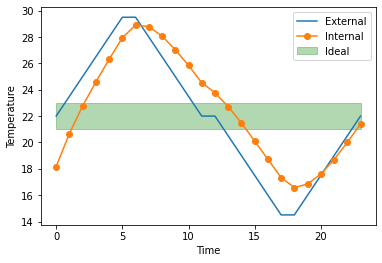

/Users/daithi/PycharmProjects/greenhouse-singularity/venv/lib/python3.8/site-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


KeyboardInterrupt: 

In [5]:
"""Deep Deterministic Policy Gradient"""
from agents.DDPG_Agent import DDPGAgent

action_size = env.action_space.shape[0]
observation_size = env.observation_space.n
agent = DDPGAgent(observation_size, action_size, random_seed=0)
rewards_history = []
num_episodes = int(2e3)

for i_episode in range(1, num_episodes):
    observation = env.reset()
    done = False
    while not done:

        action = agent.act(observation)
        next_observation, reward, done, info = env.step(action)
        agent.step(observation, action, reward, next_observation, done)
        observation = next_observation

    if i_episode == 1:
        env.render()

    if i_episode % 100 == 0:
        print(f"Episode: {i_episode}, Average Reward: {np.mean(rewards_history[-100:])}")

    rewards_history.append(np.sum(env.reward_history))

print("Training Complete")
env.render()
rewards_DDPG = np.convolve(rewards_history, np.ones(10), 'valid') / 10
x = np.arange(len(rewards_DDPG))
plt.plot(x, rewards_DDPG)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

## 5. Conclusion
---
Initial POC work is promising.

# todo
1. create a continuous version of the greenhouse gym so that we can use policy based methods
    - This will involve scaling the cooling to an action space of [-1, 1]
    - handling the scaling from [-1, 1] to [min_action, max_action] in the environment makes system more robust to changing agents
    - use box2D for the action space
    - re-look at bipedal if confused
2. add complexity to the physical simulation
    - radiative heat flow
    - air exchanges
    - CO2
    - humidity
    - transpiration
3. address todos in PDQ and DQ agent code